<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/HW3pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 4A.

In [ ]:
import numpy as np
import networkx as nx
import random
import math
import matplotlib.pyplot as plt

def alg(A, beta, gamma, dt, T, j):
  N = 100

  S = np.ones([N,T])
  I = np.zeros([N,T])
  R = np.zeros([N,T])

  S[j,0] = 0
  I[j,0] = 1

  for t in range(1, T):
    S[:,t] = S[:, t - 1]
    I[:,t] = I[:, t - 1]
    R[:,t] = R[:, t - 1]

    for i in range(N):
      if(S[i,(t-1)]) == 1:
        ni = 0
        for j in range(N):
          ni += (A[i,j]) * (I[j, t-1])

          if np.random.rand() < (1 - math.exp(-dt*ni*beta)):
            I[i,t] = 1
            S[i,t] = 0

      if(I[i,t-1] == 1):
        if np.random.rand() < (1 - math.exp(-dt*gamma)):
          R[i,t] = 1
          I[i,t] = 0

  return I


RESULTS: In this question we are implementing Algorithm 2 which is representative of a network SIR model. Modeling in this way is important because much of our daily interactions and contacts with others follow a network pattern. We interact with many of the same poeple and come into contact with many of the same people on a daily basis. Our contacts then also encounter many of their routine people in a day. This is a very credible way to model the spread of epidemics and plagues. When a node (representative of an indiviudal in this case) is attached to an infected node, the likelihood of that individual contracting the disease heightens. This algorithm returns the number of infected individuals at a given time (I) and is used in part c of this question.

QUESTIONS 4B.

-0.27859065392927207


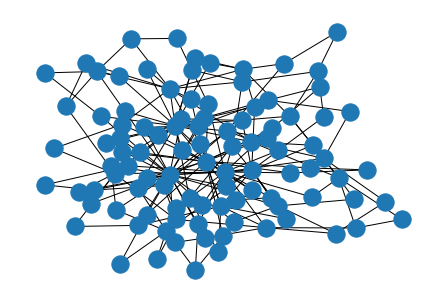

In [ ]:
import networkx as nx

ba = nx.read_adjlist("ba_graph.adjlist")
ws = nx.read_adjlist("ws_graph.adjlist")

nx.draw_spring(ba)
coeff = nx.degree_assortativity_coefficient(ba)
print(coeff)


RESULTS: This first graph is the result of graphing the data found in "ba_graph.adjlist". As we can see in this example, many of the nodes are linked to other nodes on the outskirts representing high degree nodes to low degree nodes. Additionally, we can prove that this graph of ba_graph.adjlist is disassortative because it provides us with a negative correlation coefficent.

0.16584699453550872


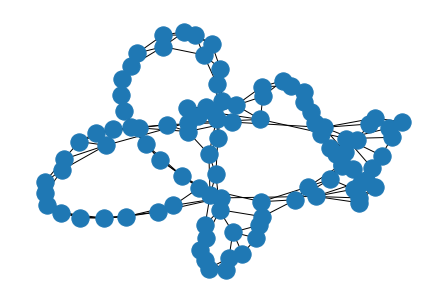

In [ ]:
nx.draw_spring(ws)
coeff = nx.degree_assortativity_coefficient(ws)
print(coeff)

RESULTS: This second graph is the result of the data in ws_graph.adjlist. As we can see here, this graph resembles an assortative network because of the way that many high degree nodes are linked to other high degree nodes. The epidemic spreads quickly from person to person but ultimately is smaller than other epidemics in the long run. The susceptibility within a population dies out and therefore the epidemic ends sooner than a diassortative network. Additionally, further evidence that proves that this is an assortative network is the positive correlation coefficient.

QUESTION 4C.

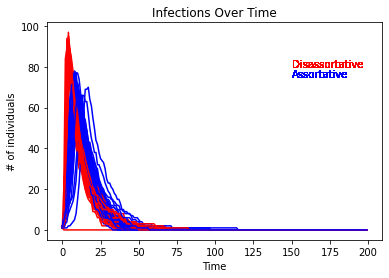

In [ ]:
import math

B = nx.adjacency_matrix(ba).todense()
W = nx.adjacency_matrix(ws).todense()

for i in range(50):
  j = random.randrange(B.shape[0])
  alg2 = alg(B, 1 , 1, 0.1, 200, j)
  y = alg2.sum(axis = 0)
  plt.plot(y, color = "red")

  j = random.randrange(W.shape[0])
  alg3 = alg(W, 1 , 1, 0.1, 200, j)
  y2 = alg3.sum(axis = 0)
  plt.plot(y2, color = "blue")

  plt.xlabel("Time")
  plt.ylabel("# of individuals")
  plt.title("Infections Over Time")
  plt.text(150,80,"Disassortative", color = "red")
  plt.text(150,75,"Assortative", color = "blue")


plt.show()


This model runs the algorithm from part a on the two networks from part b. It helps shows the progression of an epidemic over time as it relates to the number of individuals infected at a given time. In this model, we can see that the red spikes higher than the blue at around 100, though it ends sooner. In contrast, the blue, only hits a peak around 80, but it persists for a longer amount of time. With this information and the information that we learned previously, red is the disassortative graph of BA because of its negative coefficient and results in a larger epidemic of individuals infected. The blue graph follows the data from WS and is assortative. This is true because of its peak at a smaller value. The disassorative spreads slower (in red) but generates more individuals infected as expected.